In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

import seaborn as sns

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#downloading the iris dataset, splitting it into train set and validation set 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col=['sepal_length','sepal_width','petal_length','petal_width','type']

df = pd.read_csv(url, names = col)

# Print first 5 rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df2 = df
df2['type']  = df2['type'].replace({'Iris-setosa': 0})
df2['type']  = df2['type'].replace({'Iris-versicolor': 1})
df2['type']  = df2['type'].replace({'Iris-virginica': 2})
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df2.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')

In [7]:
X = df2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #predictors

y = df2[['type']] #target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
t1 = pd.crosstab(df2['type'], df2['sepal_length'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9,Total
type,,,,,,,,,,,,,,,,,,,,,
0,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,50
1,0,0,0,0,0,0,1,2,1,1,...,1,1,0,0,0,0,0,0,0,50
2,0,0,0,0,0,0,1,0,0,0,...,3,0,1,3,1,1,1,4,1,50
Total,1,3,1,4,2,5,6,10,9,4,...,4,1,1,3,1,1,1,4,1,150


<AxesSubplot:xlabel='sepal_length'>

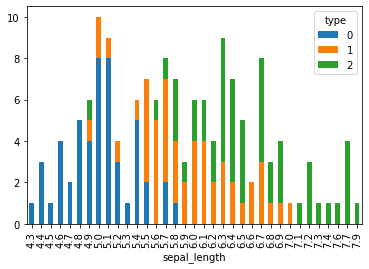

In [10]:
t1_plot = pd.crosstab(df2['sepal_length'], df2['type'])
t1_plot.plot(kind='bar', stacked = True)

In [11]:
NB = GaussianNB()  
nb_01 = NB.fit(X_train, y_train)   
y_predict = nb_01.predict(X_test)  
print("Accuracy NB: {:.2f}".format(NB.score(X_test, y_test)))

Accuracy NB: 1.00


/Users/sean/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [12]:
y_test.index

Int64Index([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
             54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
             44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83],
           dtype='int64')

In [13]:
y_predict = pd.DataFrame(y_predict,index = y_test.index, columns = ['predict'])